## Boombikes: bikesharing problem

# Introduction


### Import libraries and environment setup

In [1]:
# for data
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Setting seaborn as default style

# for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import MinMaxScaler

# for statistical and tests
import scipy

# 1. EDA

### Read and understand the data

In [2]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Check size
bike_df.shape

(730, 16)

In [4]:
# To check nulls and data_type.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check for any duplicate records
sum(bike_df.duplicated())

0

In [6]:
# Check unique values in all columns
bike_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [7]:
## instant and dteday have all unique records
## 

In [8]:
# Check year spread w.r.t month
bike_df.groupby('yr')['mnth'].count()

yr
0    365
1    365
Name: mnth, dtype: int64

In [9]:
# understanding categorical variable season based on description in data dictionary
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# understanding categorical variable weekday based on description in data dictionary
bike_df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [11]:
# understanding categorical variable weathersit based on description in data dictionary
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
### Data pre-processing

In [13]:
'''
Drop unnecessary columns:
instant - unique for each row, somekind of index, possibly primary key of table for SQL lovers.
dteday - unique for each row, shows data for each day. yr and mnth which corresponds to the dteday has been derived from this column and which will be used instead.
casual and registered - The sum of both is shown in cnt which is the dependant variable that we want to understand and predict.
'''
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
'''
Checking if a column can be treated as numerical or categorical variable.
Few of the numerical columns for instance have ordinality but are not continious for this analysis sp it is analysed as a categorical variable. 
 Rule: Treat a column as categorical, if the maximum number of unique values  is less than 15 or else its treated as continous numeric.
Create array of variables for  categorical and numerical
'''
def func_variable_type(dtf, col, max_cat=15):
    if (dtf[col].nunique() < max_cat):
        cat_list.append(col)
    else:
        num_list.append(col)

In [15]:
#Call function func_varable_type and print categorical and numeric variable 
cat_list=[]
num_list=[]
dic_cols = {col:func_variable_type(bike_df, col, max_cat=15) for col in bike_df.columns}
# Print the variable 
print("Categorial variable :", cat_list)
print("Numeric variable :", num_list)

Categorial variable : ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Numeric variable : ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


### Key findings: 1

- no missing data among 730 records.

- Below unnecessary columns were removed as they don't add any value or are redundant
    - **instant** -  unique for each row, used for identifying record, possibly primary key of table for SQL lovers.
    - **dteday** - unique for each row, shows data for each day. yr and mnth which corresponds to the dteday has been derived from this column and which will be used instead.
    - **casual** and **registered** - The sum of both is shown in cnt which is the dependant variable that we want to understand and predict.

- Few of columns with numerical values for instance have ordinality but are not continious or don't have enough unique values so it is analysed as a categorical variable.

- categorical variables: 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'

- numerical variables: 'temp', 'atemp', 'hum', 'windspeed', 'cnt'

- **cnt** is the is the dependant variable that we want to understand and predict.

In [16]:
'''
Mapping categorial variables as per metadata description.

In constrast to other categorial variable, we are not mapping few variables -  yr, holiday, workingday, weathersit. The existing Label-encoding works well for those variables.
 Reasons:
     For year(yr) and weathersit we have some kind of ranked order or hierarchy.
     For holiday and wokingday they have boolen values and doesn't require further conversion
     
For the below variables(in this scenario) we are not correlating count with increase/decrease in variable values- so we will use Dummy variable encoding later to convert to numeric variables.
'''
# Mapping season
bike_df['season'] = bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

# Mapping mnth
bike_df['mnth']=bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Mapping  weekday
bike_df['weekday']=bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

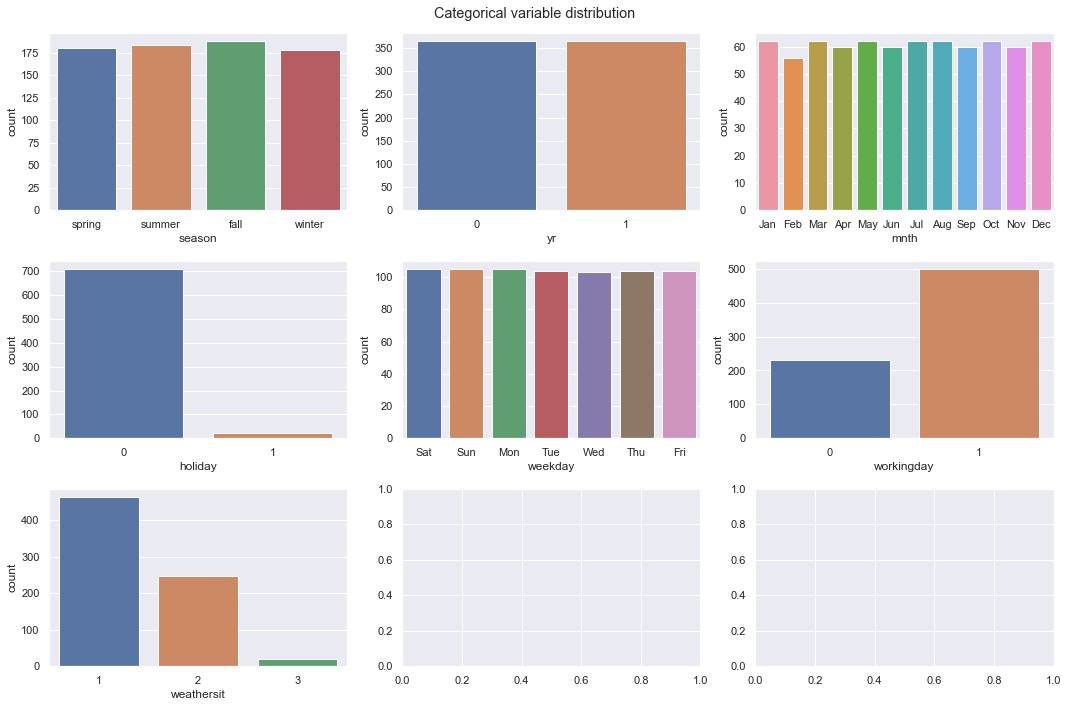

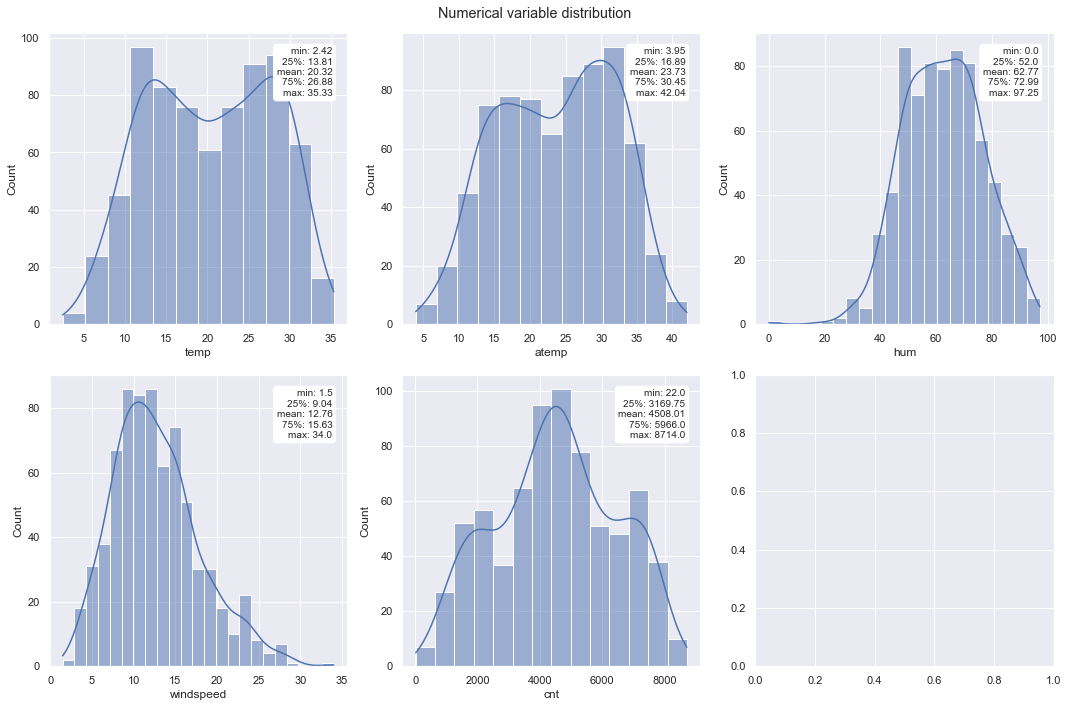

In [17]:
#Univariant analysis
#Subplot
fig,axs = plt.subplots(3,3,figsize=(15,10))
fig.suptitle('Categorical variable distribution')
axs = axs.flat
totals= []
for ax,column in zip(axs,cat_list):
    sns.countplot(x=bike_df[column],ax=ax)
plt.tight_layout()



fig,axs = plt.subplots(2,3,figsize=(15,10))
fig.suptitle('Numerical variable distribution')
axs = axs.flat
for ax, column in zip(axs, num_list):
    sns.histplot(bike_df[column],kde=True,ax=ax)
    desc = bike_df[column].describe()
    desc = round(desc, 2).apply(lambda x: str(x))
    box = '\n'.join(("min: "+desc["min"], "25%: "+desc["25%"], "mean: "+desc["mean"], "75%: "+desc["75%"], "max: "+desc["max"]))
    ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
plt.tight_layout()

# Multivariat analysis

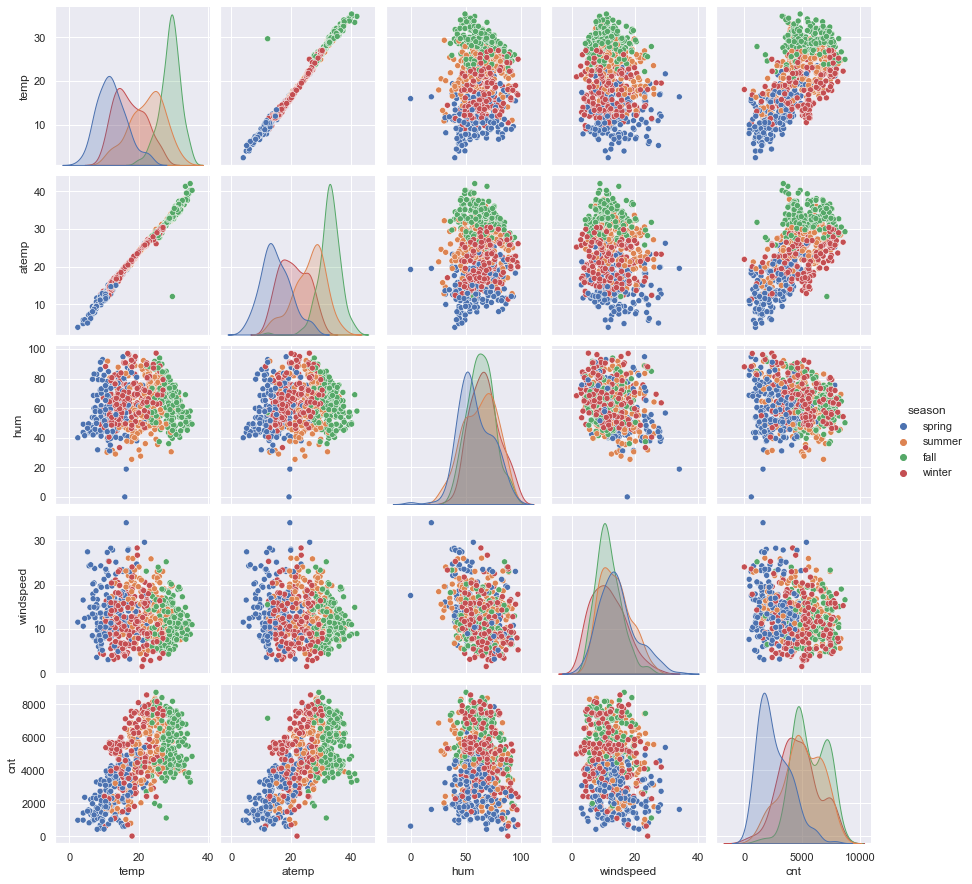

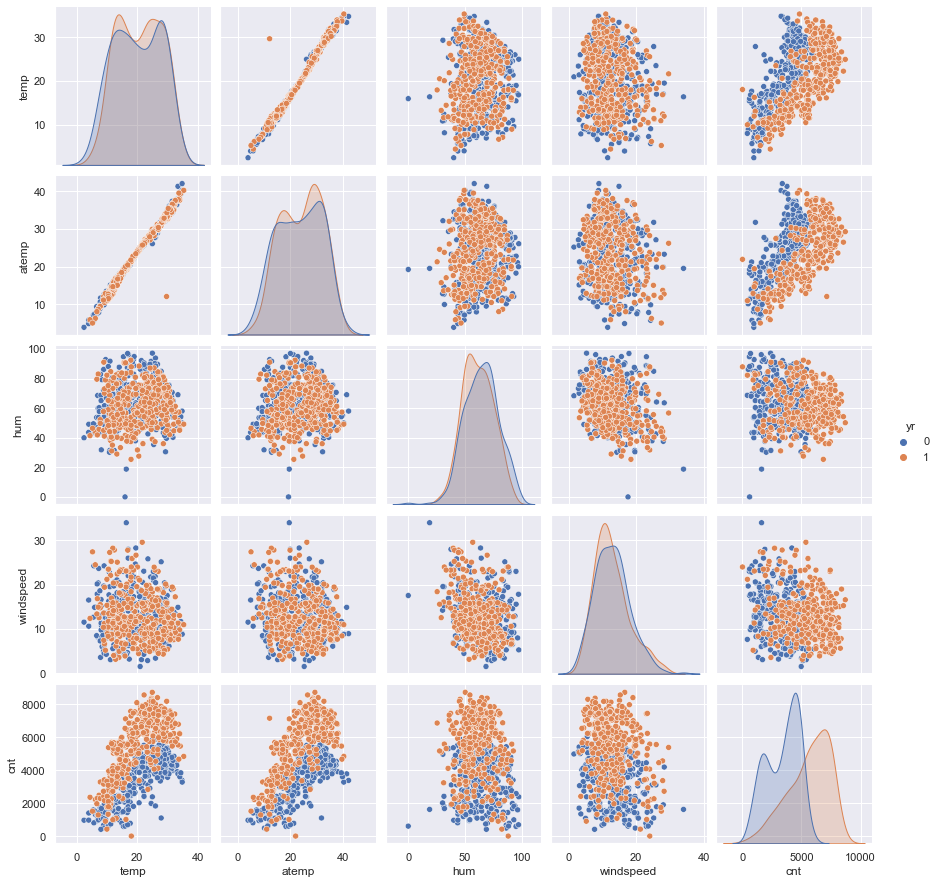

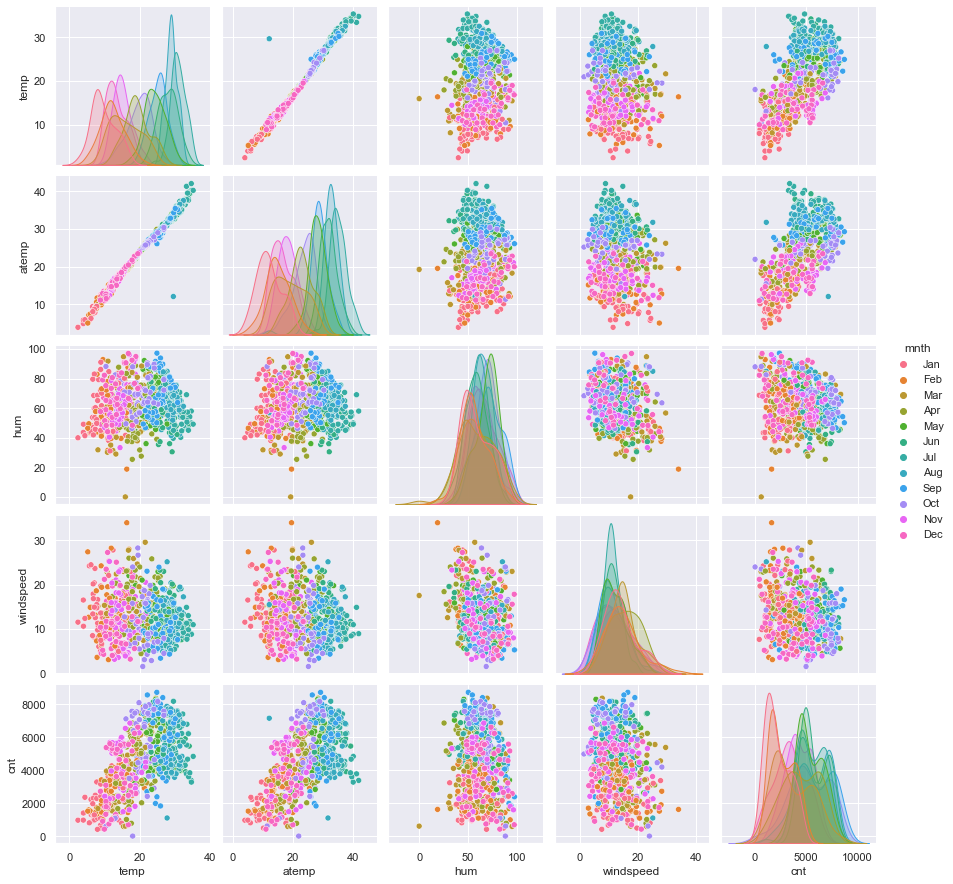

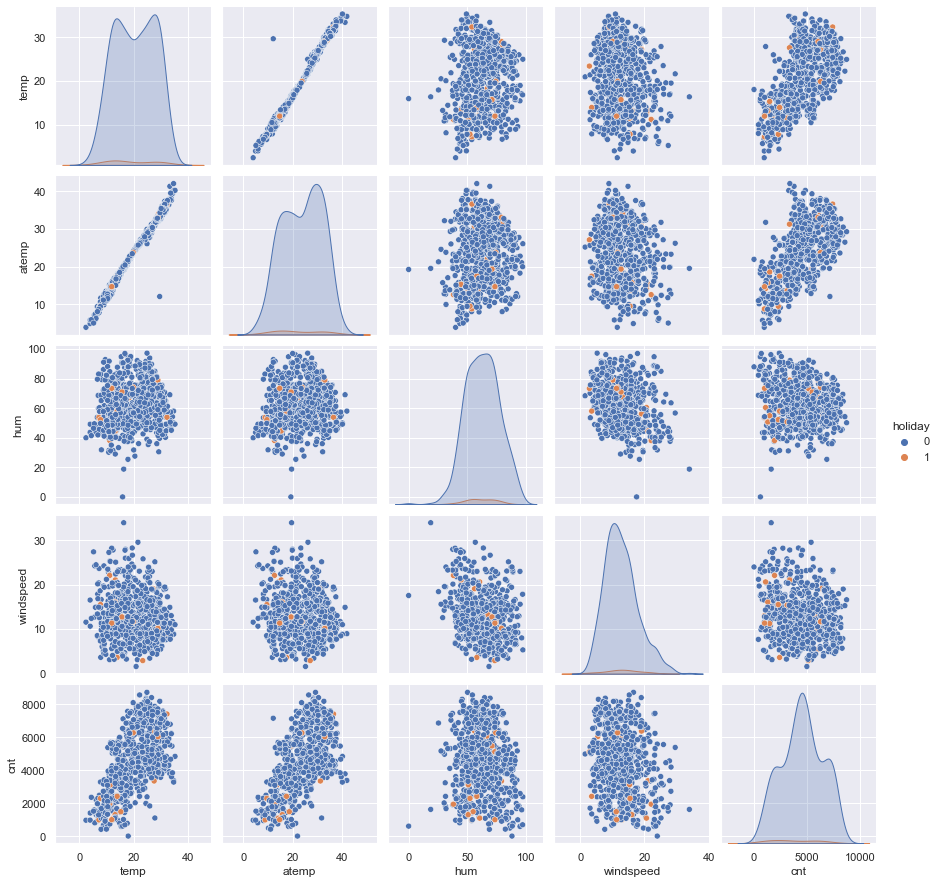

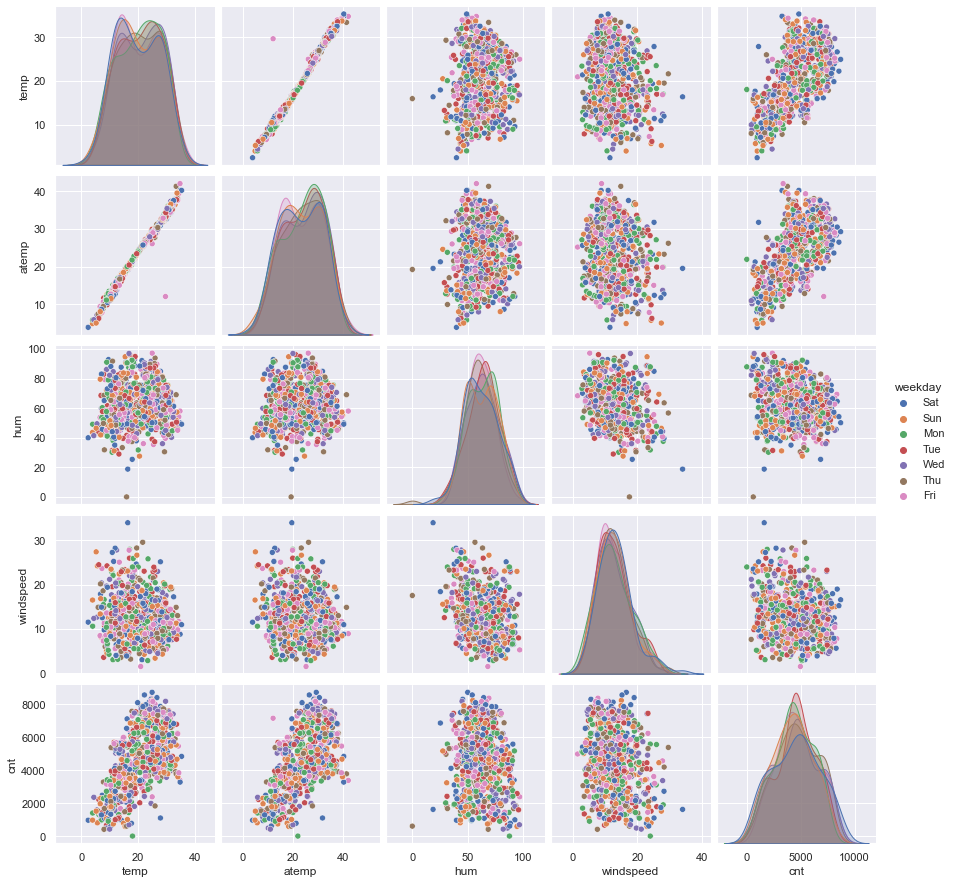

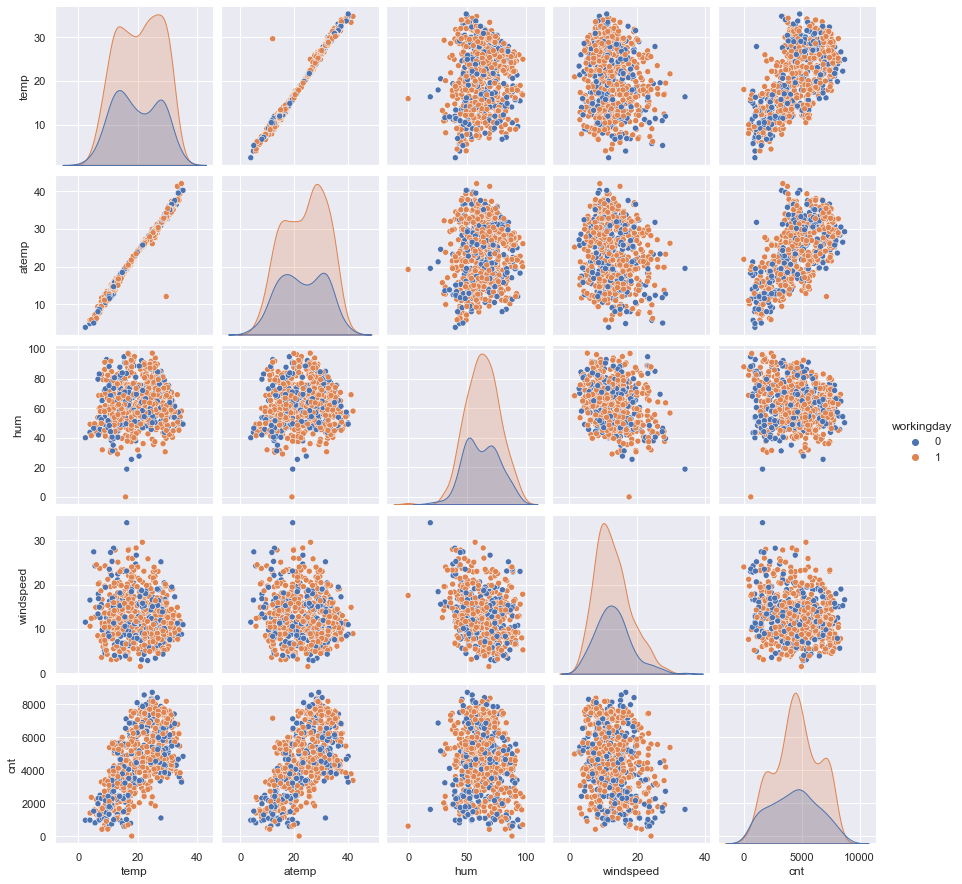

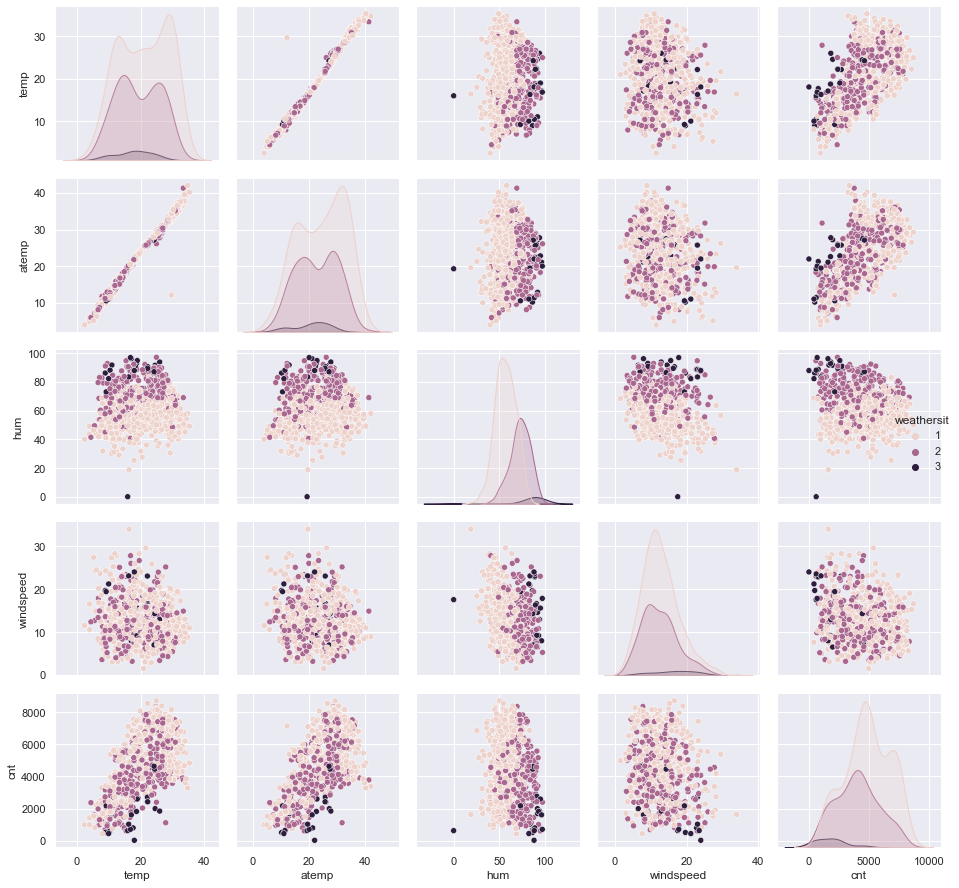

In [18]:
# Adding category variable as legends
# Pairplot with hue
numvar_df = bike_df[num_list]
for i in range(0, len(cat_list)):
    hue_cat = str(cat_list[i])
#    sns.pairplot(numvar_df, hue=hue_cat)
    sns.pairplot(bike_df,vars= num_list, hue=hue_cat)
plt.tight_layout()

###  Correlation Analysis

##### examines the linear correlation between variable pairs. And this is can be achieved by combining corr() function with sns.heatmap() .

<AxesSubplot:>

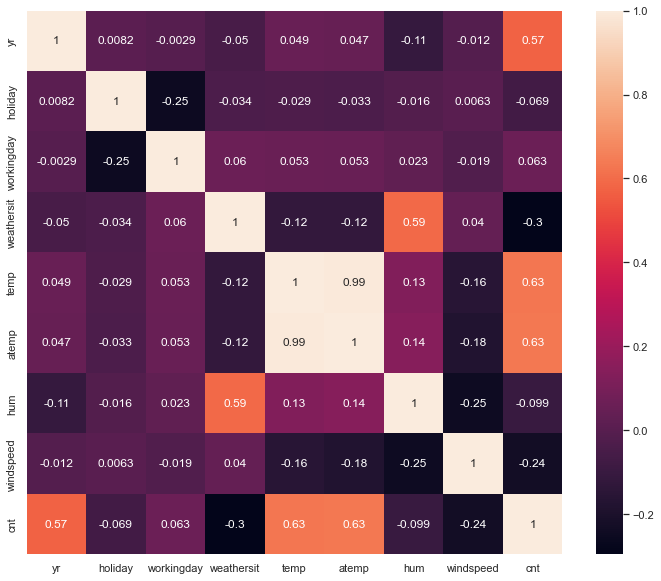

In [19]:
plt.figure(column,figsize=(12,10))
correlation = bike_df.corr()
sns.heatmap(correlation, annot=True)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

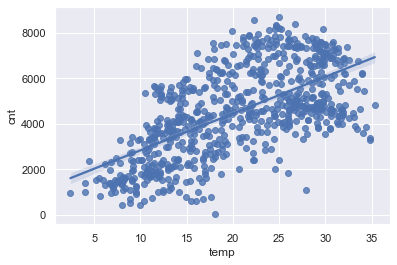

In [20]:
## 
sns.regplot(x="temp",y="cnt",data=bike_df)

## 2. Feature Engineering

In [21]:
bike_df.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Sat           0           2  14.110847   
1  spring   0  Jan        0     Sun           0           2  14.902598   
2  spring   0  Jan        0     Mon           1           1   8.050924   
3  spring   0  Jan        0     Tue           1           1   8.200000   
4  spring   0  Jan        0     Wed           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [22]:
#Dummy variable
bike_enc = pd.get_dummies(data=bike_df, columns=['season','mnth','weekday'],drop_first=True)
bike_enc.shape

(730, 29)

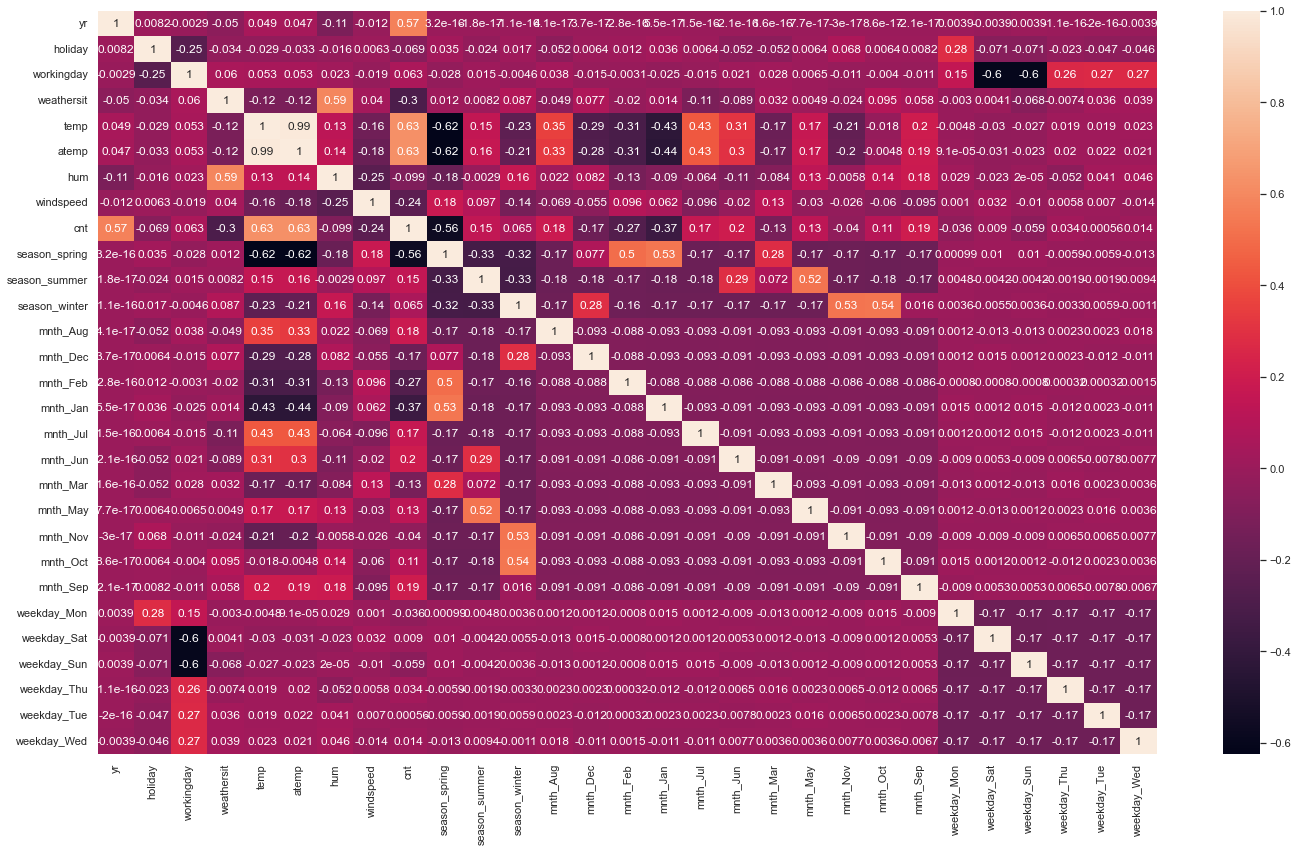

In [23]:
# Checking corelation again with all variables
plt.figure(column,figsize=(20,12))
correlation = bike_enc.corr()
sns.heatmap(correlation, annot=True)
plt.tight_layout()

## 3. Modeling
### Supervised learning
* The y column is cnt. It will help to predict the correct count.

In [24]:
# Split data and create training set and testing set
#y = bike_df.pop('cnt')
#X = bike_df

In [25]:
# Create training and testing sets: with 25% split with no rows repeating in both set.
bikef_train, bikef_test = model_selection.train_test_split(bike_enc, test_size=0.25)

In [26]:
# Training set X and y variables 
y_train = bikef_train.pop('cnt')
X_train = bikef_train

# Test set X and y variables 
y_test = bikef_test.pop('cnt')
X_test = bikef_test

In [27]:
# print info
print("X_train shape:", X_train.shape, ", X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train),2), ", y_test mean:", round(np.mean(y_test),2))
print(X_train.shape[1],"features:", X_train.columns.to_list())

X_train shape: (547, 28) , X_test shape: (183, 28)
y_train mean: 4523.56 , y_test mean: 4461.53
28 features: ['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed']


#### Scale the feature
* As this is a regression problems, best practice is to scale both input and target variables

In [33]:
scaler = MinMaxScaler()
bikefs_train = scaler.fit_transform(X_train)
bikesX_train = pd.DataFrame(bikefs_train, columns=bikef_train.columns,index=bikef_train.index)
#X = scaler.fit_transform(X_train)
#bikeft_scaled = pd.DataFrame(X, columns=X_train.columns,index=X_train.index )
#y= scaler.fit_transform(y_train).values.reshape(-1,1)
bikesX_train.head()

yr  holiday  workingday  weathersit      temp     atemp       hum  \
466  1.0      0.0         1.0         0.0  0.421625  0.404993  0.354753   
654  1.0      0.0         1.0         0.0  0.494311  0.487038  0.643654   
670  1.0      0.0         1.0         0.0  0.368668  0.363564  0.425915   
366  1.0      1.0         0.0         0.0  0.266546  0.227394  0.246484   
600  1.0      0.0         1.0         0.5  0.801670  0.745617  0.544344   

     windspeed  season_spring  season_summer  ...  mnth_May  mnth_Nov  \
466   0.552573            0.0            1.0  ...       0.0       0.0   
654   0.162820            0.0            0.0  ...       0.0       0.0   
670   0.502572            0.0            0.0  ...       0.0       1.0   
366   0.633460            1.0            0.0  ...       0.0       0.0   
600   0.102571            0.0            0.0  ...       0.0       0.0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
466       0.0       0.0          0.0          0.0          0.0          1.0   
654       1.0       0.0          0.0          0.0          0.0          0.0   
670       0.0       0.0          0.0          0.0          0.0          0.0   
366       0.0       0.0          1.0          0.0          0.0          0.0   
600       0.0       0.0          0.0          0.0          0.0          0.0   

     weekday_Tue  weekday_Wed  
466          0.0          0.0  
654          0.0          1.0  
670          0.0          0.0  
366          0.0          0.0  
600          0.0          0.0  

[5 rows x 28 columns]

In [34]:
# Checking corelation again with all variables
plt.figure(column,figsize=(20,12))
correlation = bikefs_train.corr()
sns.heatmap(correlation, annot=True)
plt.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1440x864 with 0 Axes>